In [ ]:
import pathlib
from google.colab import drive
drive.mount('/content/gdrive')
data_dir = "/content/gdrive/My Drive/Colab Notebook/dataset/"
data_dir = pathlib.Path(data_dir)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import pandas as pd
import seaborn as sn
import tensorflow as tf
import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]



train_path ='/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train'
valid_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/Validation/Validation'
test_path = '/content/gdrive/MyDrive/Colab Notebooks/dataset/Test/Test'

In [ ]:
mobile = MobileNet(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in mobile.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train/*')

In [ ]:
x = Flatten()(mobile.output)
x = Dense(1024,activation='relu')(x)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=mobile.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_dataset = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_dataset = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
training_set = train_dataset.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

validation_set = valid_dataset.flow_from_directory(valid_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_dataset.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 1960 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [ ]:
training_set.classes

array([0, 0, 0, ..., 7, 7, 7], dtype=int32)

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

<ipython-input-86-d86fd9a9487e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
62/62 [==============================] - 51s 795ms/step - loss: 5.8432 - accuracy: 0.8546 - val_loss: 0.6595 - val_accuracy: 0.9500
Epoch 2/15
62/62 [==============================] - 58s 947ms/step - loss: 0.1851 - accuracy: 0.9832 - val_loss: 0.3175 - val_accuracy: 0.9719
Epoch 3/15
62/62 [==============================] - 49s 800ms/step - loss: 0.1778 - accuracy: 0.9837 - val_loss: 0.4321 - val_accuracy: 0.9672
Epoch 4/15
62/62 [==============================] - 48s 784ms/step - loss: 0.2986 - accuracy: 0.9791 - val_loss: 0.3260 - val_accuracy: 0.9797
Epoch 5/15
62/62 [==============================] - 48s 782ms/step - loss: 0.3041 - accuracy: 0.9770 - val_loss: 0.8112 - val_accuracy: 0.9578
Epoch 6/15
62/62 [==============================] - 59s 951ms/step - loss: 0.2698 - accuracy: 0.9786 - val_loss: 1.1947 - val_accuracy: 0.9547
Epoch 7/15
62/62 [==============================] - 51s 828ms/step - loss: 0.0990 - accuracy: 0.9934 - val_loss: 0.3701 - val_accuracy: 0.9797

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=validation_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(validation_set)
)

<ipython-input-87-d86fd9a9487e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/15
62/62 [==============================] - 49s 789ms/step - loss: 0.2660 - accuracy: 0.9883 - val_loss: 0.4066 - val_accuracy: 0.9812
Epoch 2/15
62/62 [==============================] - 48s 778ms/step - loss: 0.2272 - accuracy: 0.9898 - val_loss: 0.6861 - val_accuracy: 0.9719
Epoch 3/15
62/62 [==============================] - 48s 774ms/step - loss: 0.1340 - accuracy: 0.9913 - val_loss: 0.5502 - val_accuracy: 0.9781
Epoch 4/15
62/62 [==============================] - 49s 783ms/step - loss: 0.0137 - accuracy: 0.9980 - val_loss: 0.6360 - val_accuracy: 0.9750
Epoch 5/15
62/62 [==============================] - 48s 780ms/step - loss: 0.0262 - accuracy: 0.9959 - val_loss: 0.9157 - val_accuracy: 0.9734
Epoch 6/15
62/62 [==============================] - 47s 768ms/step - loss: 0.0348 - accuracy: 0.9980 - val_loss: 0.9179 - val_accuracy: 0.9672
Epoch 7/15
62/62 [==============================] - 52s 836ms/step - loss: 0.1571 - accuracy: 0.9923 - val_loss: 0.2635 - val_accuracy: 0.9844

In [ ]:
from google.colab import files
from IPython.display import Image

uploaded = files.upload()


Saving 1-removebg-preview.png to 1-removebg-preview (1).png


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_mobilenet.h5')

In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

640/640 - 6s - loss: 0.0906 - accuracy: 0.9969 - 6s/epoch - 9ms/step

Test accuracy: 0.996874988079071


In [ ]:
test_loss,test_acc = model.evaluate(test_set, verbose=2)
print('\nTest accuracy:', test_acc)

640/640 - 6s - loss: 0.0906 - accuracy: 0.9969 - 6s/epoch - 10ms/step

Test accuracy: 0.996874988079071


In [ ]:
from tensorflow.keras.models import load_model

model.save('model_mobilenet.h5')


import tensorflow as tf
from tensorflow.keras.applications import MobileNet

# Load the pre-trained MobileNet model
model = MobileNet(weights='imagenet')

#img = image.load_img('9-removebg-preview.png',target_size=(224,224))
#plt.imshow(img);

#x= image.img_to_array(img)
#x=np.expand_dims(x,axis=0)
#images =np.vstack([x])
#val=model.predict(images)
#val=model.predict_function(images)
#print(val)
# Load and preprocess the test image
img = tf.keras.preprocessing.image.load_img('/content/gdrive/MyDrive/Colab Notebooks/dataset/Train/Train/Bilimbi/15-removebg-preview.png', target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed = tf.keras.applications.mobilenet.preprocess_input(img_batch)
predictions = model.predict(img_preprocessed)
predicted_class = tf.keras.applications.mobilenet.decode_predictions(predictions, top=1)[0][0]

# Print the predicted class and its confidence score
print(predicted_class)

1/1 [==============================] - 0s 411ms/step
('n13133613', 'ear', 0.4446157)


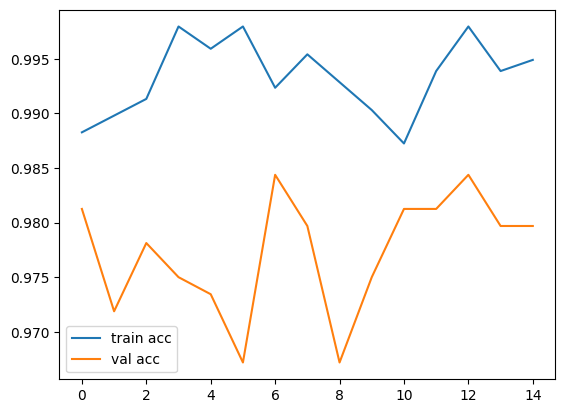

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

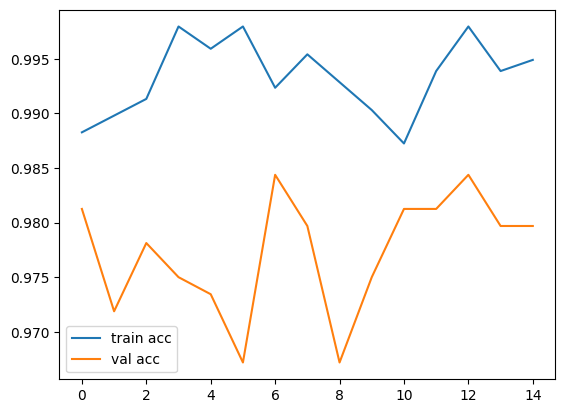

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

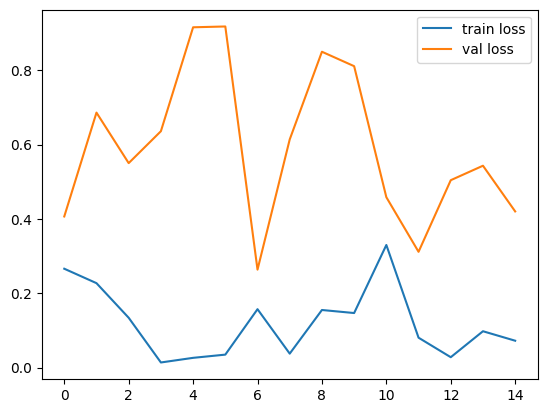

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

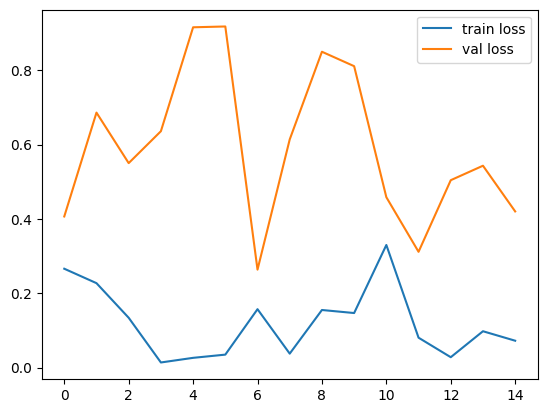

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


In [ ]:
nb_samples = len(test_set)
print(nb_samples)

640


1/1 [==============================] - 0s 18ms/step


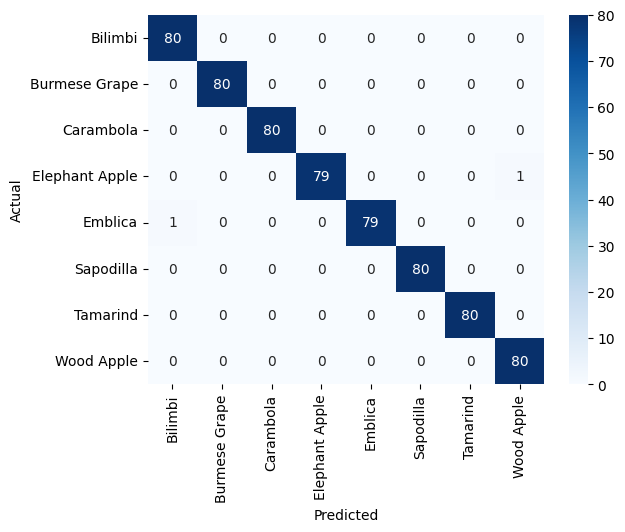

test accuracy : 99.6875


In [ ]:
model = tf.keras.models.load_model("model_mobilenet.h5")
filenames = test_set.filenames
#nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))



In [ ]:
100000000000000000000000000000000000000000000001111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111model = tf.keras.models.load_model("model_mobilenet.h5")
filenames = test_set.filenames
#nb_samples = len(test_set)
y_prob=[]
y_act=[]
test_set.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_set.next()
  y_prob.append(model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(training_set.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix,cmap='Blues', annot=True,fmt='d')
plt.show()
print('test accuracy : {}'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))



SyntaxError: ignored